### Instrucciones:
* El test tiene un máximo de 2:00 horas de duración
* Se permite hacer consultas por internet
* Las respuestas incluyendo código deben verse reflejadas en el notebook
* Enviar el notebook con respuestas al correo del instructor al terminar si hay algo que mejorar

P1. Cargar el dataset datos.csv en Pandas. 
Mostrar las filas iniciales en la pantalla. Cuantas filas y columnas hay    

In [1]:
import pandas as pd

P2. Existe una columna que copia el índice. Eliminarla del dataframe y mostrar el resultado.

In [2]:
url = "https://raw.githubusercontent.com/JoelIFBB/PYTHON_DATA_SCIENCE/main/datos/datos.csv"

# Usar pandas para cargar los datos
datos = pd.read_csv(url,delimiter=',',index_col=None)


In [3]:
df=pd.DataFrame(datos)

df = df.drop(df.columns[0], axis=1)
df


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


P3. ¿Cuántas personas de sexo masculino y femenino están representadas en el dataset?

In [4]:
def sex_males(df, sex) :
    MaleFemale = df.groupby(sex)[sex].count() #así estaba antes de usar función 
    return MaleFemale
MaleFemale=sex_males(df,'sex')
MaleFemale

sex
Female    10771
Male      21789
Name: sex, dtype: int64

In [155]:
MaleFemale = df['sex'].value_counts() # convertir a función
MaleFemale

sex
Male      21789
Female    10771
Name: count, dtype: int64

In [156]:
MaleFemale=sex_males(df,'sex')
MaleFemale

sex
Female    10771
Male      21789
Name: sex, dtype: int64

P4. ¿Cuál es la edad promedio del sexo masculino?

In [5]:
def avg_age_males(df,sex,age):
    avg_male=df.groupby(sex)[age].mean() #así estaba antes de usar función 
    return avg_male
avg_age_males(df,'sex','age')

sex
Female    36.858230
Male      39.433567
Name: age, dtype: float64

P5. ¿Cuál es la proporción de cubanos del dataset?

In [6]:
def percent_cubanos(df,pais) :
    total_native_country = df['native-country'].count()
    cubanos=(df['native-country']==pais).sum()
    result= round((cubanos/total_native_country)*100,2) 
    porcentaje_formateado = "{:.2f}%".format(result)
    # result= str(round((cubanos/total_native_country)*100,2)) + '%'  --> Manera de colocar simbolo '%' a resultado
    return porcentaje_formateado
percent_cubanos(df,'Cuba')

'0.29%'

In [8]:
def avg_age_salary(df,salary,sex,age):
    avg_age=df.groupby([salary,sex])[age].mean()
    return avg_age
avg_age_salary(df,'salary','sex','age')

salary  sex   
<=50K   Female    36.210801
        Male      37.146890
>50K    Female    42.125530
        Male      44.625788
Name: age, dtype: float64

P6. ¿Cuál es la edad promedio de aquellos que ganan más de 50K y menos de 50K? 

In [10]:
def avg_age_salary(df,salary,age):
    avg_age_salary=df.groupby(salary)[age].mean()
    return avg_age_salary
avg_age_salary(df,'salary','age')

salary
<=50K    36.783648
>50K     44.249841
Name: age, dtype: float64

In [18]:
avg_age=df.groupby('salary')['age'].mean()

In [166]:
avg_age

salary
<=50K    36.783648
>50K     44.249841
Name: age, dtype: float64

In [11]:
def salary_education(df,education,salary):
    salary_education=df.groupby([education,salary]).size().unstack(fill_value=0) # Size y unstack son muy útiles
    return salary_education

In [12]:
salary_education(df,'education','salary')

salary,<=50K,>50K
education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


In [13]:
def salary_education_master(df,educacion,puesto):
    salary_education_master=df[educacion].apply(lambda x: 1 if x == puesto else 0).sum() # Size y unstack son muy útiles
    return salary_education_master

In [14]:
salary_education_master(df,'education','Masters')

1723

In [17]:
def salary_education(df,education,salary):
    salary_education=df.groupby([education,salary]).size().unstack(fill_value=0) # Size y unstack son muy útiles
    return salary_education

P7. ¿Todos los que ganan mas de 50K al año tienen un master? 

In [16]:
salary_education=(df['education']=='Masters').sum()

In [172]:
salary_education

1723

In [19]:
education__salary=df.groupby(['education','salary']).size().unstack(fill_value=0)

In [20]:
education__salary

salary,<=50K,>50K
education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


P8. Determinar el número de horas promedio por semana que se trabaja en cada país para <=50K y >50K

In [175]:
avg_week_salary=df.groupby(['native-country','salary']).size().unstack(fill_value=0)
avg_week_salary

salary,<=50K,>50K
native-country,,
?,437,146
Cambodia,12,7
Canada,82,39
China,55,20
Columbia,57,2
Cuba,70,25
Dominican-Republic,68,2
Ecuador,24,4
El-Salvador,97,9


In [21]:
avg_week_salary=df.groupby(['native-country','salary'])['hours-per-week'].mean().unstack(fill_value=0)
avg_week_salary

salary,<=50K,>50K
native-country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000


In [29]:
import matplotlib.pyplot as plt

P9. Agrupar y contar los registros de <=50K y >50K. Graficar el resultado de manera apropiada.

In [24]:
def group_salary(df,salary):
   
    plt.figure(figsize=(8, 6))
    
    return
    return salary_count

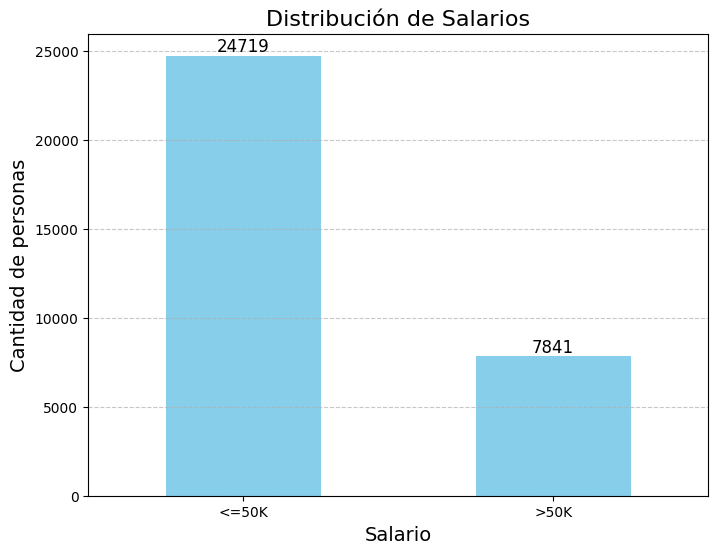

In [33]:
salary_counts=df.groupby('salary')['salary'].count()
plt.figure(figsize=(8, 6))
ax = salary_counts.plot(kind='bar', color='skyblue')
ax.bar_label(ax.containers[0], fmt='%d', fontsize=12, color='black')
# Configura el título y las etiquetas de ejes
plt.title('Distribución de Salarios', fontsize=16)
plt.xlabel('Salario', fontsize=14)
plt.ylabel('Cantidad de personas', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=0)
# Mostrar el gráfico
plt.show()


P10. Según el análisis: 
* ¿Qué campos serían idóneos para entrenar un modelo que predice si nuevos datos corresponden a <=50K o >50K?
* ¿Sería un modelo de regresión o clasificación - por qué?
* Argumentar en máx 3 párrafos.